In [1]:
import torch
from attention_dynamic_model import AttentionDynamicModel, set_decode_type
from reinforce_baseline import RolloutBaseline
from train import train_model

from time import strftime, gmtime
from utils import create_data_on_disk, get_cur_time

* change batch sizes

In [2]:
# Params of model
SAMPLES = 512# 128*10000
BATCH = 128
START_EPOCH = 0
END_EPOCH = 10
FROM_CHECKPOINT = False
embedding_dim = 128
LEARNING_RATE = 0.0001
ROLLOUT_SAMPLES = 10000
NUMBER_OF_WP_EPOCHS = 1
GRAD_NORM_CLIPPING = 1.0
BATCH_VERBOSE = 1000
VAL_BATCH_SIZE = 1000
VALIDATE_SET_SIZE = 10000
SEED = 1234
GRAPH_SIZE = 50
FILENAME = 'VRP_{}_{}'.format(GRAPH_SIZE, strftime("%Y-%m-%d", gmtime()))

In [3]:
# Initialize model
model_pt = AttentionDynamicModel(embedding_dim).cuda()
set_decode_type(model_pt, "sampling")
print(get_cur_time(), 'model initialized')

2021-03-20 15:18:12 model initialized


In [4]:
# Create and save validation dataset
validation_dataset = create_data_on_disk(GRAPH_SIZE,
                                         VALIDATE_SET_SIZE,
                                         is_save=True,
                                         filename=FILENAME,
                                         is_return=True,
                                         seed = SEED)
print(get_cur_time(), 'validation dataset created and saved on the disk')

2021-03-20 15:18:12 validation dataset created and saved on the disk


In [5]:
# Initialize optimizer
optimizer = torch.optim.Adam(params=model_pt.parameters(), lr=LEARNING_RATE)

In [6]:
# Initialize baseline
baseline = RolloutBaseline(model_pt,
                           wp_n_epochs = NUMBER_OF_WP_EPOCHS,
                           epoch = 0,
                           num_samples=ROLLOUT_SAMPLES,
                           filename = FILENAME,
                           from_checkpoint = FROM_CHECKPOINT,
                           embedding_dim=embedding_dim,
                           graph_size=GRAPH_SIZE
                           )
print(get_cur_time(), 'baseline initialized')

Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]

2021-03-20 15:18:34 baseline initialized


In [7]:
torch.cuda.empty_cache()

batch calculation at epoch 0: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 0: 1it [00:00,  2.68it/s]

grad_global_norm = 3.0253357887268066, clipped_norm = 0.9999997019767761
Epoch 0 (batch = 0): Loss: -0.7661967277526855: Cost: 30.885805130004883


batch calculation at epoch 0: 4it [00:01,  3.06it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 0)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 0 candidate mean 22.351531982421875, baseline epoch 0 mean 35.818607330322266, difference -13.46707534790039
p-value: 0.0
Update baseline
Evaluating baseline model on baseline dataset (epoch = 0)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

alpha was updated to 1.0


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 22.350400924682617
2021-03-20 15:18:50 Epoch 0: Loss: -21.594005584716797: Cost: 30.423688888549805


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]
batch calculation at epoch 1: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 1: 1it [00:00,  3.50it/s]

grad_global_norm = 23.978425979614258, clipped_norm = 0.9999998807907104
Epoch 1 (batch = 0): Loss: 469.0061950683594: Cost: 29.961463928222656


batch calculation at epoch 1: 4it [00:01,  3.45it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 1)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 candidate mean 22.395586013793945, baseline epoch 1 mean 22.33783531188965, difference 0.057750701904296875


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 22.40959930419922
2021-03-20 15:19:02 Epoch 1: Loss: 466.23681640625: Cost: 30.047138214111328


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
batch calculation at epoch 2: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 2: 1it [00:00,  3.51it/s]

grad_global_norm = 19.937807083129883, clipped_norm = 0.9999999403953552
Epoch 2 (batch = 0): Loss: 438.739013671875: Cost: 29.90321922302246


batch calculation at epoch 2: 4it [00:01,  3.48it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 2)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 2 candidate mean 22.511106491088867, baseline epoch 2 mean 22.33783531188965, difference 0.17327117919921875


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 22.582000732421875
2021-03-20 15:19:14 Epoch 2: Loss: 446.5777282714844: Cost: 30.02303695678711


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
batch calculation at epoch 3: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 3: 1it [00:00,  3.40it/s]

grad_global_norm = 15.261140823364258, clipped_norm = 0.9999998807907104
Epoch 3 (batch = 0): Loss: 507.4458312988281: Cost: 30.26268768310547


batch calculation at epoch 3: 4it [00:01,  3.17it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 3)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 3 candidate mean 28.30031967163086, baseline epoch 3 mean 22.33783531188965, difference 5.962484359741211


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 28.259599685668945
2021-03-20 15:19:41 Epoch 3: Loss: 538.822265625: Cost: 30.43437957763672


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
batch calculation at epoch 4: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 4: 1it [00:00,  3.06it/s]

grad_global_norm = 3.421754837036133, clipped_norm = 0.9999996423721313
Epoch 4 (batch = 0): Loss: 550.684814453125: Cost: 30.2383975982666


batch calculation at epoch 4: 4it [00:01,  3.00it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 4)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 4 candidate mean 51.71715545654297, baseline epoch 4 mean 22.33783531188965, difference 29.37932014465332


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 51.84600067138672
2021-03-20 15:20:21 Epoch 4: Loss: 570.0072021484375: Cost: 30.481876373291016


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]
batch calculation at epoch 5: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 5: 1it [00:00,  2.88it/s]

grad_global_norm = 9.666980743408203, clipped_norm = 0.9999998807907104
Epoch 5 (batch = 0): Loss: 645.9495239257812: Cost: 31.070077896118164


batch calculation at epoch 5: 4it [00:01,  2.90it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 5)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 5 candidate mean 27.598947525024414, baseline epoch 5 mean 22.33783531188965, difference 5.261112213134766


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 27.790800094604492
2021-03-20 15:20:49 Epoch 5: Loss: 608.4923095703125: Cost: 30.645423889160156


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]
batch calculation at epoch 6: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 6: 1it [00:00,  3.05it/s]

grad_global_norm = 4.345269680023193, clipped_norm = 0.9999997615814209
Epoch 6 (batch = 0): Loss: 568.7644653320312: Cost: 30.576744079589844


batch calculation at epoch 6: 4it [00:01,  2.91it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 6)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 6 candidate mean 22.30232810974121, baseline epoch 6 mean 22.33783531188965, difference -0.0355072021484375
p-value: 0.09204038420554396


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 22.324100494384766
2021-03-20 15:21:01 Epoch 6: Loss: 581.2493896484375: Cost: 30.6254825592041


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]
batch calculation at epoch 7: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 7: 1it [00:00,  3.04it/s]

grad_global_norm = 4.725929260253906, clipped_norm = 0.9999997019767761
Epoch 7 (batch = 0): Loss: 582.7633056640625: Cost: 30.82787322998047


batch calculation at epoch 7: 4it [00:01,  2.89it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 7)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 7 candidate mean 24.34373664855957, baseline epoch 7 mean 22.33783531188965, difference 2.005901336669922


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 24.359500885009766
2021-03-20 15:21:40 Epoch 7: Loss: 606.6537475585938: Cost: 30.7020206451416


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]
batch calculation at epoch 8: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 8: 1it [00:00,  2.78it/s]

grad_global_norm = 2.2663397789001465, clipped_norm = 0.9999996423721313
Epoch 8 (batch = 0): Loss: 647.9097290039062: Cost: 30.332523345947266


batch calculation at epoch 8: 4it [00:01,  2.92it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 8)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 8 candidate mean 46.83316421508789, baseline epoch 8 mean 22.33783531188965, difference 24.495328903198242


Rollout greedy execution:   0%|          | 0/1 [00:00<?, ?it/s]

Validation score: 46.7057991027832
2021-03-20 15:22:22 Epoch 8: Loss: 607.3875732421875: Cost: 30.516685485839844


Rollout greedy execution: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]
batch calculation at epoch 9: 0it [00:00, ?it/s]

Current decode type: sampling


batch calculation at epoch 9: 1it [00:00,  3.04it/s]

grad_global_norm = 4.993065357208252, clipped_norm = 0.9999998211860657
Epoch 9 (batch = 0): Loss: 599.0702514648438: Cost: 30.64830780029297


batch calculation at epoch 9: 4it [00:01,  2.98it/s]
Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating candidate model on baseline dataset (callback epoch = 9)


Rollout greedy execution:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 9 candidate mean 44.40572738647461, baseline epoch 9 mean 22.33783531188965, difference 22.06789207458496


Rollout greedy execution: 100%|██████████| 10/10 [00:21<00:00,  2.12s/it]


Validation score: 44.0989990234375
2021-03-20 15:23:06 Epoch 9: Loss: 629.662109375: Cost: 30.716087341308594
   epochs        loss       cost
0       0  -21.594006  30.423689
1       1  466.236816  30.047138
2       2  446.577728  30.023037
3       3  538.822266  30.434380
4       4  570.007202  30.481876
5       5  608.492310  30.645424
6       6  581.249390  30.625483
7       7  606.653748  30.702021
8       8  607.387573  30.516685
9       9  629.662109  30.716087


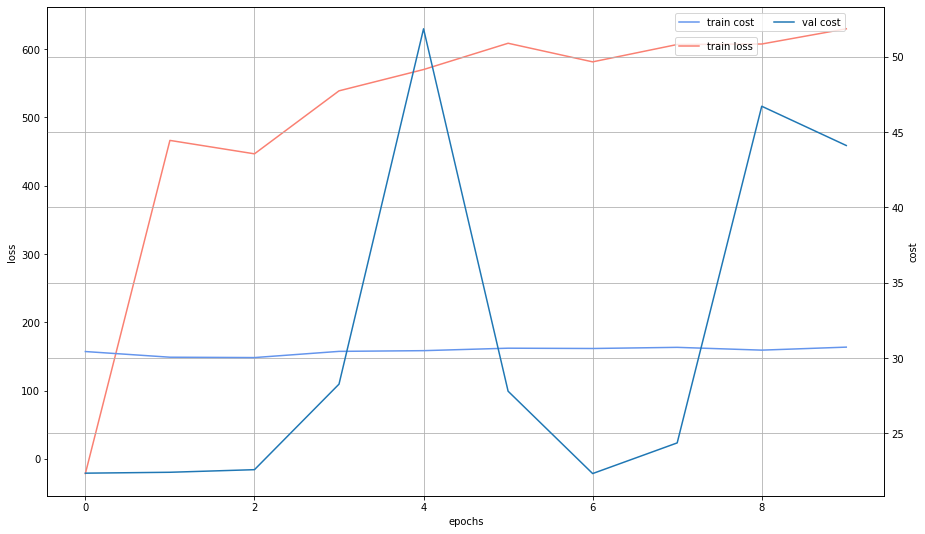

CPU times: user 21min 11s, sys: 1.35 s, total: 21min 12s
Wall time: 4min 32s


In [8]:
%%time
train_model(optimizer,
            model_pt,
            baseline,
            validation_dataset,
            samples = SAMPLES,
            batch = BATCH,
            val_batch_size = VAL_BATCH_SIZE,
            start_epoch = START_EPOCH,
            end_epoch = END_EPOCH,
            from_checkpoint = FROM_CHECKPOINT,
            grad_norm_clipping = GRAD_NORM_CLIPPING,
            batch_verbose = BATCH_VERBOSE,
            graph_size = GRAPH_SIZE,
            filename = FILENAME
            )